In [10]:
from tensorflow.keras.models import load_model

# Tải mô hình từ tệp
loaded_model = load_model( r'C:\Users\Admin\Documents\DPL302m\Kaggle competition\model_weights\model3_ver.h5')


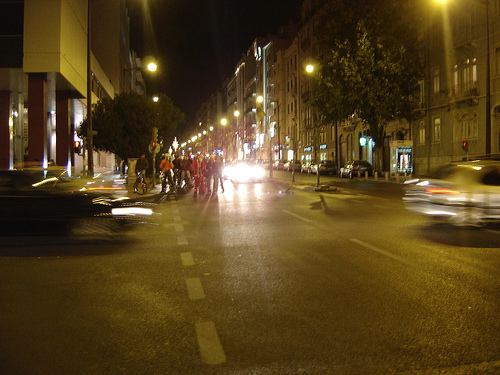

In [32]:
from tensorflow.keras.preprocessing import image
#loading the image
img = image.load_img(r'C:\Users\Admin\Documents\DPL302m\Kaggle competition\Flood Data\New folder\85226534.jpg')
img

In [33]:
import tensorflow as tf
img = image.img_to_array(img)/255
img = tf.image.resize(img,(256,256))
img = tf.expand_dims(img,axis=0)

print("Image Shape",img.shape)

Image Shape (1, 256, 256, 3)


In [34]:
prediction = int(tf.round(loaded_model.predict(x=img)).numpy()[0][0])

# Kiểm tra giá trị dự đoán và gắn nhãn tương ứng
if prediction == 0:
    label = "non_flood"
else:
    label = "flood"

print("The predicted label is:", label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
The predicted label is: non_flood


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

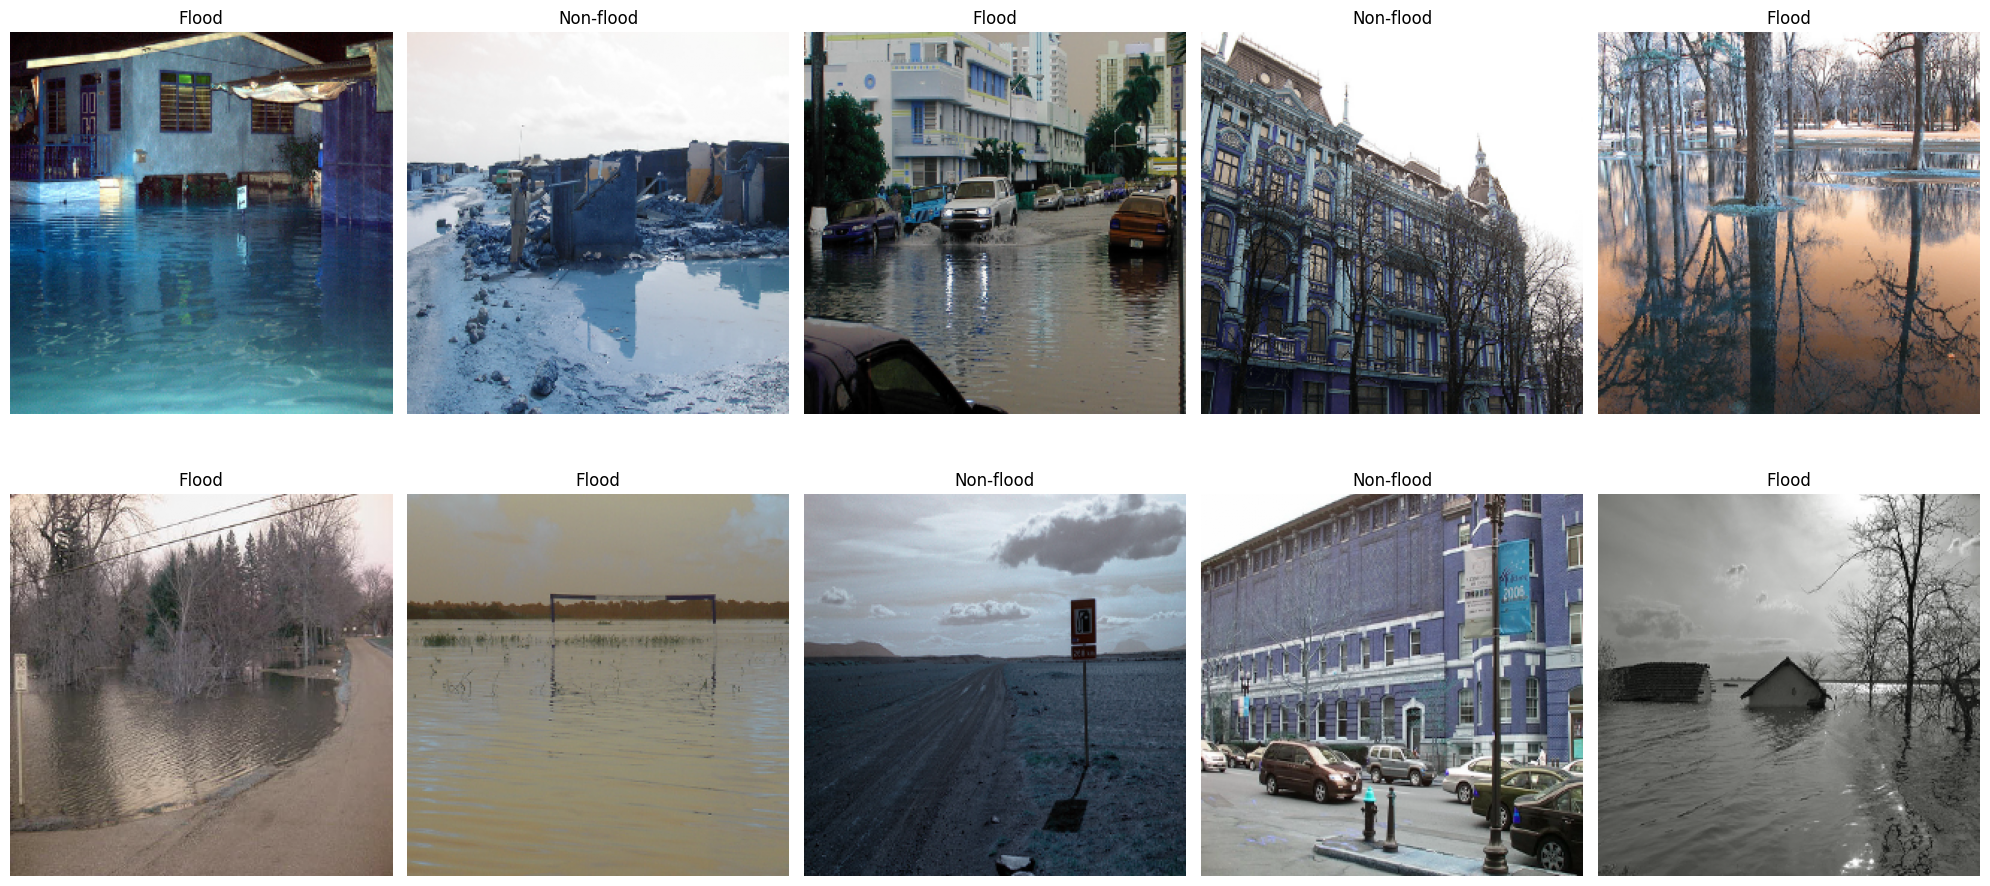

In [39]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def preprocess_images(img_paths, model, image_size=(256, 256)):
    # Khởi tạo danh sách để lưu trữ các ảnh sau khi được tiền xử lý
    preprocessed_images = []
    labels = []

    # Duyệt qua từng đường dẫn ảnh
    for img_path in img_paths:
        # Đọc ảnh từ đường dẫn
        img = cv2.imread(img_path)
        
        # Kiểm tra xem ảnh có được đọc thành công không
        if img is None:
            print(f"Failed to read image from path: {img_path}")
            continue
        
        # Thay đổi kích thước của ảnh đến kích thước mong muốn
        img = cv2.resize(img, image_size)
        
        # Chuẩn hóa giá trị pixel của ảnh về khoảng [0, 1]
        img = img / 255.0
        
        # Thêm ảnh vào danh sách
        preprocessed_images.append(img)
        
        # Dự đoán nhãn cho ảnh
        prediction = model.predict(np.expand_dims(img, axis=0))
        label = np.argmax(prediction)
        
        # Thêm nhãn vào danh sách
        labels.append(label)
    
    # Chuyển danh sách ảnh và nhãn thành mảng NumPy
    preprocessed_images = np.array(preprocessed_images)
    labels = np.array(labels)
    
    return preprocessed_images, labels

# Đường dẫn đến thư mục chứa các ảnh cần dự đoán
img_folder_path = r'C:\Users\Admin\Documents\DPL302m\Kaggle competition\Flood Data\New folder'

# Lấy danh sách các tệp trong thư mục
img_files = [os.path.join(img_folder_path, f) for f in os.listdir(img_folder_path) if os.path.isfile(os.path.join(img_folder_path, f))]

# Load model đã được huấn luyện
model_path = r'C:\Users\Admin\Documents\DPL302m\Kaggle competition\model_weights\model3_ver.h5'
model = tf.keras.models.load_model(model_path)

# Tiền xử lý các ảnh và dự đoán nhãn tương ứng
preprocessed_images, labels = preprocess_images(img_files, model)

# Hiển thị ảnh cùng với nhãn tương ứng
def display_images_with_labels(images, labels):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
    axes = axes.flatten()
    for i, ax in enumerate(axes):
        ax.imshow(images[i])
        ax.set_title('Flood' if labels[i] == 0 else 'Non-flood')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Hiển thị ảnh cùng với nhãn
display_images_with_labels(preprocessed_images, labels)


In [40]:
import pandas as pd

# Tạo DataFrame từ danh sách đường dẫn và nhãn dự đoán
results_df = pd.DataFrame({'id': [os.path.basename(f) for f in img_files], 'label': labels})

# Lưu DataFrame vào file CSV
results_csv_path = 'test_predictions0.csv'
results_df.to_csv(results_csv_path, index=False)

print("Predictions saved to:", results_csv_path)


Predictions saved to: test_predictions0.csv


In [43]:
df = pd.read_csv(r'C:\Users\Admin\Documents\DPL302m\Kaggle competition\test_predictions.csv')

In [44]:
df

,id,label
0,100167480.jpg,flood
1,10021457945.jpg,non-flood
2,10025866403.jpg,non-flood
3,10035741293.jpg,non-flood
4,10126331405.jpg,non-flood
...,...,...
1315,971885887.jpg,non-flood
1316,97959078.jpg,non-flood
1317,9827845925.jpg,non-flood
1318,9833595475.jpg,flood


In [2]:
import pandas as pd

# Thực hiện thay đổi giá trị trong cột 'label'
df['label'] = df['label'].replace({'non-flood': 0, 'flood': 1})

# Lưu DataFrame đã được cập nhật vào file CSV mới
new_csv_path = 'test_predictions1.csv'
df.to_csv(new_csv_path, index=False)

print("Updated CSV saved to:", new_csv_path)


NameError: name 'df' is not defined

In [1]:
import pandas as pd

In [5]:
dff = pd.read_csv(r'C:\Users\Admin\Documents\DPL302m\Kaggle competition\test_predictions1.csv')

In [6]:
dff

,id,label
0,100167480.jpg,1
1,10021457945.jpg,0
2,10025866403.jpg,0
3,10035741293.jpg,0
4,10126331405.jpg,0
...,...,...
1315,971885887.jpg,0
1316,97959078.jpg,0
1317,9827845925.jpg,0
1318,9833595475.jpg,1


In [7]:
import pandas as pd

# Đọc file CSV vào DataFrame
df = pd.read_csv(r'C:\Users\Admin\Documents\DPL302m\Kaggle competition\test_predictions1.csv')

# Xóa đuôi '.jpg' trong cột 'id'
df['id'] = df['id'].str.replace('.jpg', '')

# Thực hiện thay đổi giá trị trong cột 'label'
df['label'] = df['label'].replace({'non-flood': 0, 'flood': 1})

# Lưu DataFrame đã được cập nhật vào file CSV mới
new_csv_path = 'test_predictions2.csv'
df.to_csv(new_csv_path, index=False)

print("Updated CSV saved to:", new_csv_path)


Updated CSV saved to: test_predictions2.csv
